## пример нахождения бликов на двух последующих фреймах, их контуров, площадей и координат центра

In [57]:
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [58]:
sourcefolder = './task1-data-part1/'
savefoldeer = './Sveta_test/'
sfiles = os.listdir(sourcefolder)
filename = sourcefolder + sfiles[0] #'F2_1_1_1.ts'#
print(sfiles[0])
vidcap = cv2.VideoCapture(filename)

F1_2_2_1.ts


найдено контуров: 862, сохранено контуров: 862
найдено контуров: 747, сохранено контуров: 747
найдено контуров: 862, сохранено контуров: 862


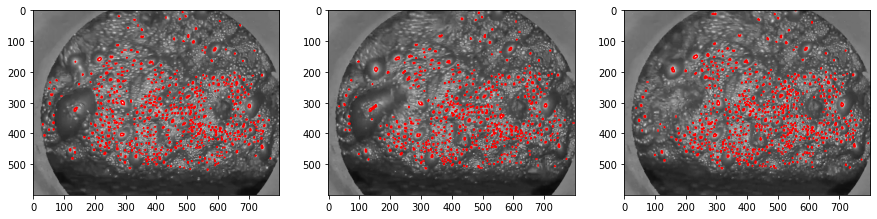

In [30]:
# для всех кадров
allImg = []
allImgs = []
allImgb = []
allBounds = []
allFeatures = [] # [площадь, x, y]
for i in range(3):
    success,images = vidcap.read()
    allImgs.append(images)
    imageg = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
    allImg.append(imageg)
    threshold, imaget = cv2.threshold(imageg, np.mean(imageg) + np.std(imageg) * 3, imageg.max(), 0)
    imageb = imaget.astype(bool).astype('uint8')
    contours, hierarchy = cv2.findContours(imageb.copy(),
                                           cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    allImgb.append(imageb)
    Bounds = []
    Features = [] # [площадь, x, y]
    for contour in contours:
        # площадь > 0 
        M = cv2.moments(contour)
        if M['m00'] > 0:
            Features.append([M['m00'], int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])])
            Bounds.append(np.vstack((contour[:,0, 0], contour[:,0, 1])))
        else:
            Features.append([1, contour[:,0,0][0], contour[:,0,1][0]])
            Bounds.append(np.vstack((contour[:,0, 0], contour[:,0, 1])))    
    print('найдено контуров: {:.0f}, сохранено контуров: {:.0f}'.format(len(contours), len(Bounds)))
    allBounds.append(Bounds)
    allFeatures.append(Features)

plt.figure(figsize=(15,8))
for i, img in enumerate(allImg):
    plt.subplot(1,len(allImg),i + 1)
    plt.imshow(img,cmap='gray')
    for ibound in allBounds[i]:
        plt.plot(ibound[0],ibound[1], 'r')

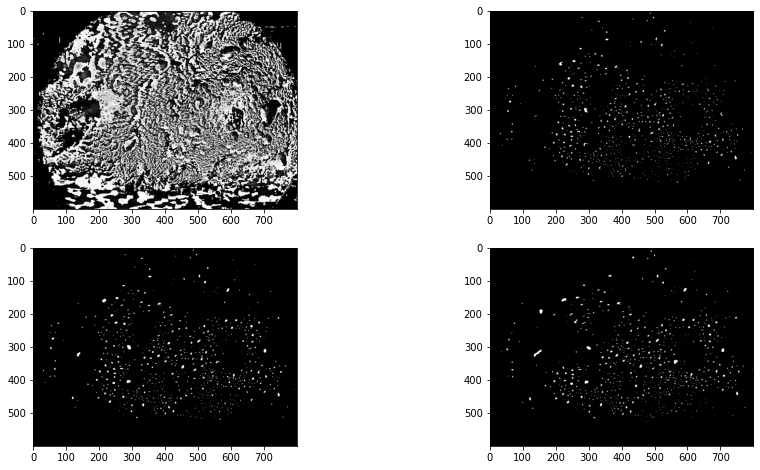

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(allImg[1] - allImg[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(allImgb[1] - allImgb[0],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(allImgb[0],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(allImgb[1],cmap='gray')

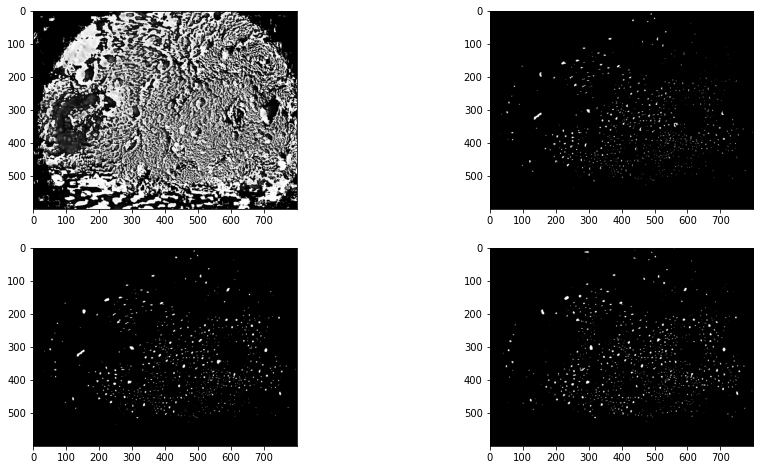

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(allImg[2] - allImg[1],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(allImgb[2] - allImgb[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(allImgb[1],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(allImgb[2],cmap='gray')

Text(0.5, 1.0, '3 - 2')

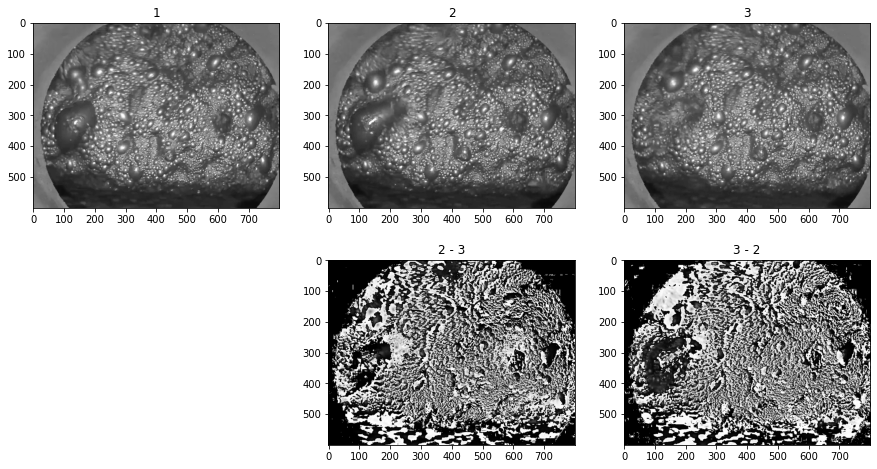

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.imshow(allImg[0],cmap='gray')
plt.title('1')
plt.subplot(2,3,2)
plt.imshow(allImg[1],cmap='gray')
plt.title('2')
plt.subplot(2,3,3)
plt.imshow(allImg[2],cmap='gray')
plt.title('3')
plt.subplot(2,3,5)
plt.imshow(allImg[1] - allImg[0],cmap='gray')
plt.title('2 - 3')
plt.subplot(2,3,6)
plt.imshow(allImg[2] - allImg[1],cmap='gray')
plt.title('3 - 2')

Text(0.5, 1.0, '3 - 2')

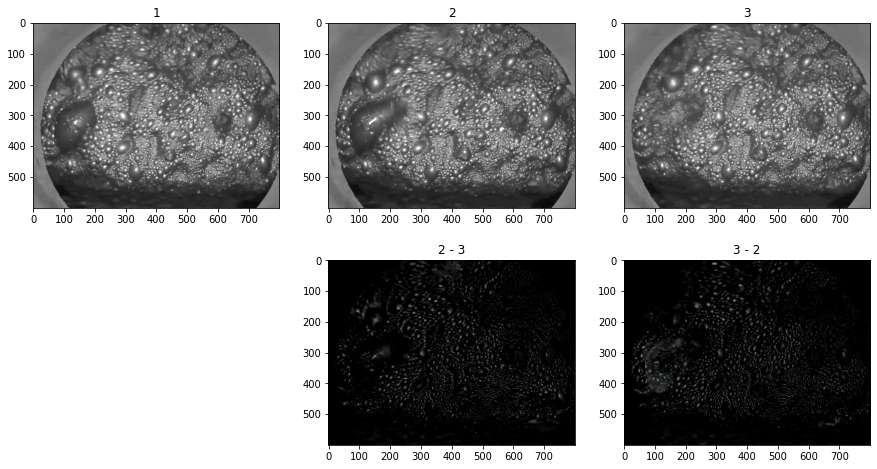

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.imshow(allImg[0],cmap='gray')
plt.title('1')
plt.subplot(2,3,2)
plt.imshow(allImg[1],cmap='gray')
plt.title('2')
plt.subplot(2,3,3)
plt.imshow(allImg[2],cmap='gray')
plt.title('3')
plt.subplot(2,3,5)
plt.imshow(cv2.subtract(allImgs[1], allImgs[0]),cmap='gray')
plt.title('2 - 3')
plt.subplot(2,3,6)
plt.imshow(cv2.subtract(allImgs[2], allImgs[1]),cmap='gray')
plt.title('3 - 2')

Text(0.5, 1.0, '3 - 2')

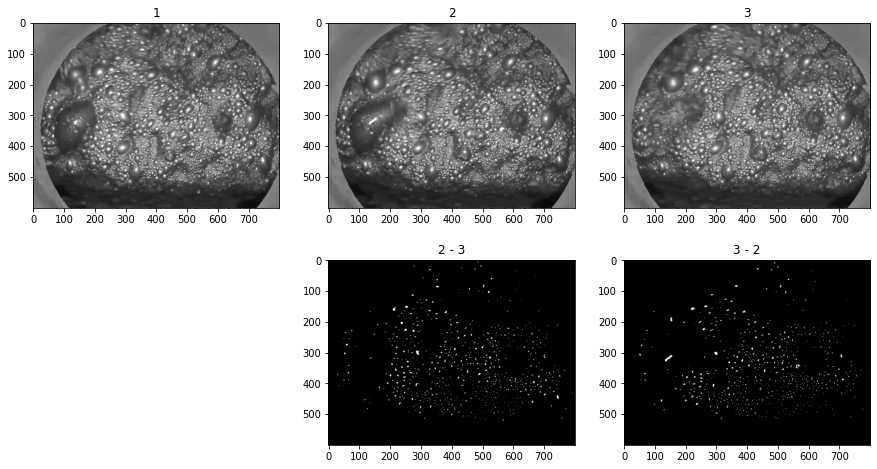

In [38]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.imshow(allImg[0],cmap='gray')
plt.title('1')
plt.subplot(2,3,2)
plt.imshow(allImg[1],cmap='gray')
plt.title('2')
plt.subplot(2,3,3)
plt.imshow(allImg[2],cmap='gray')
plt.title('3')
plt.subplot(2,3,5)
plt.imshow(allImgb[1] - allImgb[0],cmap='gray')
plt.title('2 - 3')
plt.subplot(2,3,6)
plt.imshow(allImgb[2] - allImgb[1],cmap='gray')
plt.title('3 - 2')

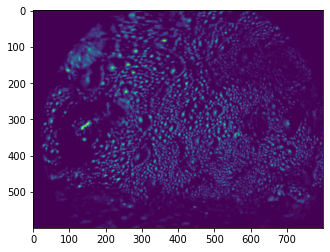

In [54]:
image = cv2.subtract(allImgs[1], allImgs[2])
image_gaussian = cv2.GaussianBlur(image,(5,5),0)
cv2.imwrite("frames_F2_2_2_2_gauss/frame99.jpg", image_gaussian) 
image_gray = cv2.cvtColor(image_gaussian, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

Threshold - 10


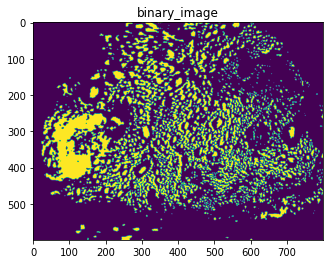

In [51]:
#Image binaryzation
image_binary = None
binarydir = "frames_F2_2_2_2_binary"
if not os.path.exists(binarydir):
    os.mkdir("frames_F2_2_2_2_binary")
threshold, image_binary = cv2.threshold(image_gray,10,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
print("Threshold - %d" % threshold)
cv2.imwrite("frames_F2_2_2_2_binary/frame99.jpg", image_binary) 

plt.imshow(image_binary)
plt.title('binary_image')
plt.show()

Total centroids 1399


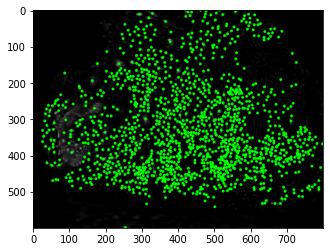

In [49]:
count, labels, stats, centroids = cv2.connectedComponentsWithStats(image_binary)

circled_image = cv2.cvtColor(image_binary, cv2.COLOR_GRAY2RGB)

image_copy = image.copy()
bound_size = 6

small_images = []
for i in range(1,count):
    #print(stats[i])
    image_copy = cv2.circle(image_copy, (int(centroids[i,0]), int(centroids[i,1])), 1, (0, 255, 0), 5)
    #image_copy = cv2.circle(image_copy, (int(centroids[i,0]), int(centroids[i,1])),  int(bound_size * abs(centroids[i, 1] - stats[i, 1])), (0, 255, 0), 5)

    #image_copy = cv2.rectangle(image_copy, (stats[i, 0], stats[i, 1]),  (stats[i, 0] + stats[i, 2], stats[i, 1] + stats[i, 3]), (0, 255, 0), 5)
    small_images.append(image_copy[max(0,int(centroids[i, 1] - bound_size * abs(centroids[i, 1] - stats[i, 1]))) : 
                                   int(centroids[i, 1] + bound_size * abs(centroids[i, 1] - stats[i, 1])), 
                                   max(0,int(centroids[i, 0] - bound_size*abs(stats[i, 0]-centroids[i, 0]))) : 
                                   int(centroids[i, 0] + bound_size*abs(stats[i, 0]-centroids[i, 0]))])
    #cv2.putText(image_copy, str(i), (int(centroids[i,0]), int(centroids[i,1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0, 255))
    #print(centroids[i, 0] - 4*abs(stats[i, 0]-centroids[i, 0]))
    #print(centroids[i, 0] + 4*abs(stats[i, 0]-centroids[i, 0]))
    #print(centroids[i, 1] - 4 * abs(centroids[i, 1] - stats[i, 1]))
    #print(centroids[i, 1] + 4 * abs(centroids[i, 1] - stats[i, 1]))

print("Total centroids %d" % len(centroids))

plt.imshow(image_copy)
plt.show()

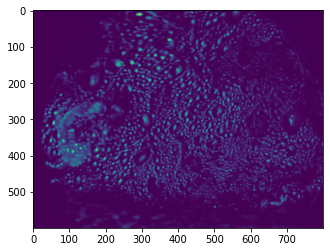

In [50]:
new_gray = image_gray.copy()
for i in range(len(small_images)):#range(148, 150):#range(len(small_images)):
    try:
        small_image = small_images[i]
        sobel_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY)
        scale = 1
        delta = 0
        ddepth = cv2.CV_16S
        grad_x = cv2.Sobel(sobel_image, ddepth, 1, 0, ksize=7, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
        #plt.imshow(grad_x)
        #plt.show()
        size = np.mean(longest_subsequence(grad_x[grad_x.shape[0]//2]))
        print(size)
        new_gray = cv2.circle(new_gray, (int(centroids[i+1,0]), int(centroids[i+1,1])), int(size), (0, 255, 0), 5)
    except:
        continue
plt.imshow(new_gray)
plt.show()

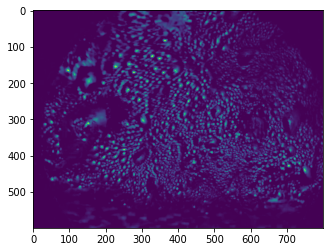

In [56]:
image = cv2.subtract(allImgs[1], allImgs[0])
image_gaussian = cv2.GaussianBlur(image,(5,5),0)
cv2.imwrite("frames_F2_2_2_2_gauss/frame99.jpg", image_gaussian) 
image_gray = cv2.cvtColor(image_gaussian, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

Threshold - 10


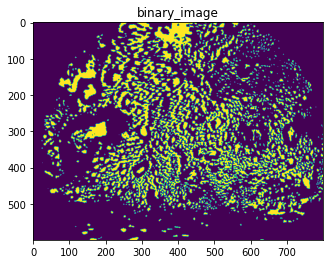

In [53]:
#Image binaryzation
image_binary = None
binarydir = "frames_F2_2_2_2_binary"
if not os.path.exists(binarydir):
    os.mkdir("frames_F2_2_2_2_binary")
threshold, image_binary = cv2.threshold(image_gray,10,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
print("Threshold - %d" % threshold)
cv2.imwrite("frames_F2_2_2_2_binary/frame99.jpg", image_binary) 

plt.imshow(image_binary)
plt.title('binary_image')
plt.show()